<a href="https://colab.research.google.com/github/AKSeavey/6_Convolutional-Neural-Network-for-Image-Classification/blob/main/project_6_CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# make sure runtime is GPU

## Problem Definition

* use deep learning on a set of pre-trained data to solve a once notorious issue in data science: how to identify between dogs and cats




In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skimage.transform import resize
from PIL import Image


## Data Collection

* Load pickled data from X.pickle and y.pickle in the Project Data/ folder.



In [ ]:
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# bring in array pickle
X_pick = '/content/drive/MyDrive/Colab Notebooks/project_6/'
infile = open(X_pick+'X.pickle','rb')
X_array = pickle.load(infile)
type(X_array)

numpy.ndarray

In [ ]:
# bring in list pickle
y_pick = '/content/drive/MyDrive/Colab Notebooks/project_6/'
infile = open(X_pick+'y.pickle','rb')
y_list = pickle.load(infile)
type(y_list)

list

## Data Cleaning

* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [ ]:
X_array.max()

255

In [ ]:
X_array.min()

0

In [ ]:
# scale so values between 0 and 1
X_array = X_array / 255

In [ ]:
X_array

array([[[[0.37254902],
         [0.36862745],
         [0.38431373],
         ...,
         [0.66666667],
         [0.6745098 ],
         [0.67058824]],

        [[0.36078431],
         [0.35686275],
         [0.37254902],
         ...,
         [0.66666667],
         [0.6745098 ],
         [0.67058824]],

        [[0.34901961],
         [0.35686275],
         [0.36078431],
         ...,
         [0.64705882],
         [0.6627451 ],
         [0.6627451 ]],

        ...,

        [[0.32941176],
         [0.29803922],
         [0.28627451],
         ...,
         [0.52941176],
         [0.64313725],
         [0.60392157]],

        [[0.32156863],
         [0.30980392],
         [0.27843137],
         ...,
         [0.55686275],
         [0.5254902 ],
         [0.6       ]],

        [[0.31372549],
         [0.33333333],
         [0.33333333],
         ...,
         [0.59215686],
         [0.57254902],
         [0.54117647]]],


       [[[0.67058824],
         [0.60392157],
         [0.54

## Exploratory Data Analysis

* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot one of the images in X using plt.imshow().

* Look at the response value in y for that image.



In [ ]:
X_array.shape

(24946, 100, 100, 1)

In [ ]:
y_list

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


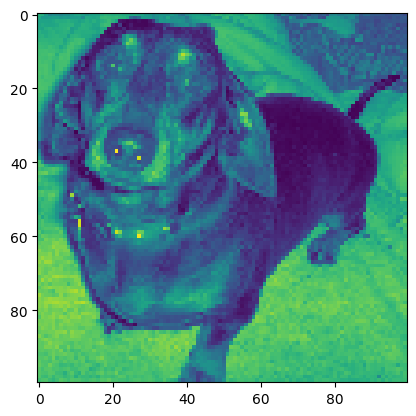

In [ ]:
plt.imshow(X_array[23456])

In [ ]:
y_list[23456]

0

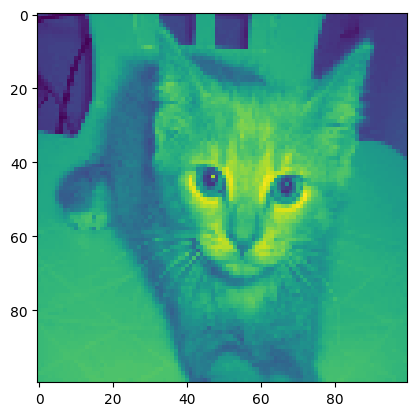

In [ ]:
plt.imshow(X_array[20198])

In [ ]:
y_list[20198]

1

## Data Processing

* Split X and y into training and testing sets.

*  Build a neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the ‘relu’ activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the ‘sigmoid’ activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the ‘adam’ optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this).

* Use the function defined above to read in the dog.jpg image that is saved in the Project 6/Data folder.

* Use the neural network you created to predict whether the image is a dog or a cat.



In [ ]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_array, y_list, test_size=0.25, random_state=42)


In [ ]:
X_train.shape

(18709, 100, 100, 1)

In [ ]:
type(y_train)

list

In [ ]:
# save a copy so we can access this as a list
y_train_list = y_train.copy()

In [ ]:
# convert list to array
y_train = np.array(y_train)

In [ ]:
# convert list to array
y_test = np.array(y_test)

In [ ]:
# create neural network using sequential model
model = Sequential()

In [ ]:
# convolutional layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# convolutional layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# convolutional layer 3
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# flatten model
model.add(Flatten())

In [ ]:
# configure output layer
model.add(Dense(1, activation = 'sigmoid', name="Output"))

In [ ]:
# compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [ ]:
# fit model with 12 training epochs
model.fit(X_train, y_train, epochs=16)

Epoch 1/16
585/585 [==============================] - 14s 11ms/step - loss: 0.6094 - accuracy: 0.6551
Epoch 2/16
585/585 [==============================] - 6s 10ms/step - loss: 0.4989 - accuracy: 0.7603
Epoch 3/16
585/585 [==============================] - 6s 11ms/step - loss: 0.4442 - accuracy: 0.7939
Epoch 4/16
585/585 [==============================] - 6s 11ms/step - loss: 0.3983 - accuracy: 0.8196
Epoch 5/16
585/585 [==============================] - 6s 10ms/step - loss: 0.3606 - accuracy: 0.8423
Epoch 6/16
585/585 [==============================] - 6s 10ms/step - loss: 0.3221 - accuracy: 0.8574
Epoch 7/16
585/585 [==============================] - 6s 10ms/step - loss: 0.2925 - accuracy: 0.8731
Epoch 8/16
585/585 [==============================] - 6s 10ms/step - loss: 0.2665 - accuracy: 0.8855
Epoch 9/16
585/585 [==============================] - 6s 10ms/step - loss: 0.2445 - accuracy: 0.8973
Epoch 10/16
585/585 [==============================] - 6s 10ms/step - loss: 0.2185 - accur

In [ ]:
model.metrics[1].metrics

[]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

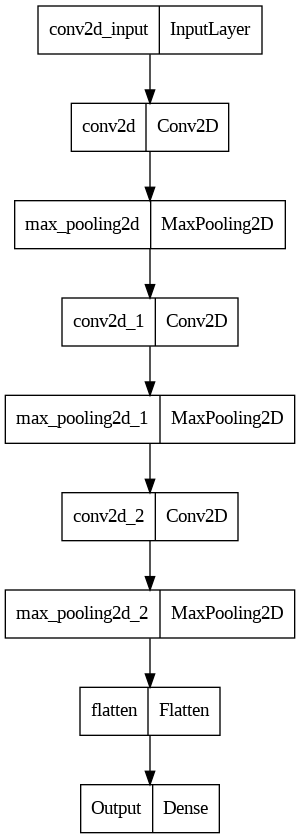

In [ ]:
plot_model(model)

In [ ]:
# validate model
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

195/195 [==============================] - 1s 6ms/step - loss: 0.4349 - accuracy: 0.8559
0.85586017370224


In [ ]:
def read_and_convert_image(image_path, target_size=(100,100), grayscale=True):
  """ read a new image,
      convert to grayscale,
      resize to 100x100
      """
  # read image using Pillow
  image = Image.open(image_path)
  # display image using Pillow
  print("Image using Pillow:")
  image.show()

  # convert image to numpy array
  image_array = np.array(image)

  # convert image to 4D array
  # 1 resize image to target size using scikit-image
  resized_image = resize(image_array, target_size)
  # 2 add a batch dim to image array
  image_4d = resized_image[np.newaxis, ...]

  if grayscale:
    image_4d = np.dot(image_4d[..., :3], [0.2989, 0.5870, 0.1140])[..., np.newaxis]

  print("Resized image using Pillow:")
  resized_image_pil = Image.fromarray((resized_image * 255).astype(np.uint8))
  resized_image_pil.show()

  return image_4d

In [ ]:
# bring in sample image
image_path = "/content/drive/MyDrive/Colab Notebooks/project_6/Copy of dog.jpg"
image_4d = read_and_convert_image("/content/drive/MyDrive/Colab Notebooks/project_6/Copy of dog.jpg", grayscale=True)


Image using Pillow:
Resized image using Pillow:


In [ ]:
# looks good, 1 at the end means grayscale
image_4d.shape

(1, 100, 100, 1)

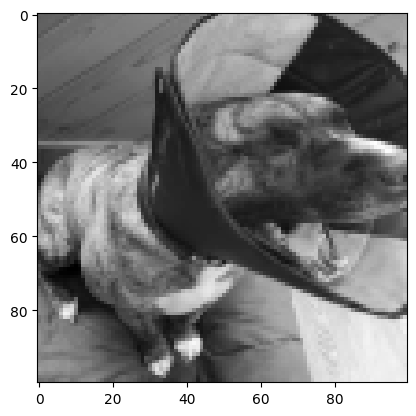

In [ ]:
# Squeeze and convert the 4D array to 2D
grayscale_image = np.squeeze(image_4d)

# Display the grayscale image using plt.imshow
plt.imshow(grayscale_image, cmap='gray')
plt.show()

In [ ]:
predictions = model.predict(image_4d)

1/1 [==============================] - 0s 176ms/step


In [ ]:
predicted_probability = predictions[0][0]
print(f'predicted_probability: {predicted_probability}')

predicted_probability: 0.2382543534040451


## Communication of Results

* Communicate the results of your analysis.



## **BONUS** (optional)

* Upload an image of your (or your friend’s or family’s) dog or cat and use your model to predict whether the image is a dog or cat.


In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/project_6/woody.jpg"
image_woody = read_and_convert_image(image_path, grayscale=True)

Image using Pillow:
Resized image using Pillow:


In [ ]:
image_woody.shape

(1, 100, 100, 1)

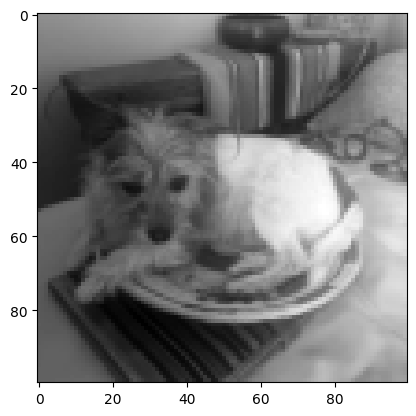

In [ ]:
# Squeeze and convert the 4D array to 2D
grayscale_image = np.squeeze(image_woody)

# Display the grayscale image using plt.imshow
plt.imshow(grayscale_image, cmap='gray')
plt.show()

In [ ]:
predictions_1 = model.predict(image_woody)

1/1 [==============================] - 0s 19ms/step


In [ ]:
predicted_probability = predictions_1[0][0]
print(f'predicted_probability: {predicted_probability}')

predicted_probability: 0.9535468220710754


#### seems like my dog is registering as a cat... could it be the cat-like way he's sitting in a basket?!